# Modeling work for RPG Game

In [8]:
#imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



## Load the data

Note that the database store has about 170K records from previous fights recorded a while ago

In [9]:
STORE = 'data/store.h5'
TABLE_KEY = 'events_df'

with pd.HDFStore(STORE) as store:
    src_df = store.get(TABLE_KEY)
    store.close()

#src_df.set_index('attack_id', inplace=True)

src_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169179 entries, 0 to 0
Data columns (total 57 columns):
att_attack_amt                 169179 non-null int64
att_base_attack_amt            169179 non-null int64
att_blocked                    169179 non-null int64
att_blocked_amt                169179 non-null int64
att_critical                   169179 non-null int64
att_dodged                     169179 non-null int64
att_enemy_base_hp              169179 non-null int64
att_enemy_hp                   169179 non-null int64
att_enemy_is_dead              169179 non-null int64
att_enemy_prev_hp              169179 non-null int64
att_event_time                 169179 non-null object
att_missed                     169179 non-null int64
att_overkill_amt               169179 non-null int64
attack_id                      169179 non-null int64
en_block_amount                169179 non-null float64
en_block_chance                169179 non-null float64
en_can_block                   169179 non

## Build test and train sets

In [10]:

src_df['att_effective_amt'] = src_df.att_attack_amt - src_df.att_blocked_amt
src_df['att_blocked_amt'] = -1 * src_df.att_blocked_amt

att_dodged_bool = src_df.att_dodged ==1

src_df.loc[att_dodged_bool, 'att_effective_amt'] = 0

#landed_attack_bool = src_df.att_attack_amt > 0

#df = src_df[landed_attack_bool]
msk = np.random.rand(len(src_df)) < 0.8

train = src_df[msk]
test = src_df[~msk]

### Build the model

In [11]:
model = LinearRegression(fit_intercept=False)

input_cols = ['att_blocked_amt', 'att_base_attack_amt',
                  'player_min_damage', 'player_max_damage', 'att_blocked',
                  'att_critical', 'att_dodged', 'att_missed']

x_train = train[input_cols]
y_train = train[['att_effective_amt']]

x_test = test[input_cols]

model.fit(x_train, y_train)

x_train['predicted'] = model.predict(x_train)

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
pred = model.predict(test[input_cols])

test.loc[:, 'predicted'] = pred
print(test.loc[:,['att_effective_amt', 'predicted']].head())

    att_effective_amt  predicted
0                  41  44.622588
4                  33  33.930126
6                  40  43.185331
12                 47  52.742634
17                 49  55.113652


C:\Program Files\Python36\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files\Python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


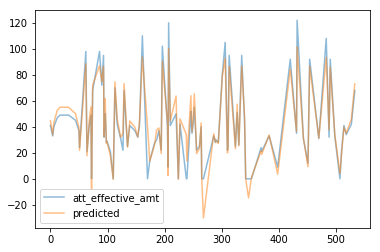

In [13]:
test[['att_effective_amt', 'predicted']].head(100).plot(alpha=.5);

In [14]:
train.head()

,att_attack_amt,att_base_attack_amt,att_blocked,att_blocked_amt,att_critical,att_dodged,att_enemy_base_hp,att_enemy_hp,att_enemy_is_dead,att_enemy_prev_hp,...,player_legs_slot,player_level,player_main_hand_slot,player_max_damage,player_min_damage,player_miss_chance,player_name,player_off_hand_slot,player_shoulders_slot,att_effective_amt
1,38,38,0,0,0,0,13604,8665,0,8703,...,24,2,-99,49,18,0.05,Roman,-99,20,38
2,47,47,1,-27,0,0,11169,5680,0,5700,...,24,2,-99,51,18,0.05,Oliver,-99,21,20
3,21,21,0,0,0,0,8892,4469,0,4490,...,23,1,-99,45,17,0.05,Finn,-99,20,21
5,80,32,0,0,1,0,9700,4766,0,4846,...,22,1,-99,44,16,0.05,Conrad,-99,20,80
7,17,17,0,0,0,0,10509,5568,0,5585,...,23,1,-99,46,16,0.05,Sandy,-99,20,17


In [15]:
test.loc[:, ['att_effective_amt', 'predicted']].head()

,att_effective_amt,predicted
0,41,44.622588
4,33,33.930126
6,40,43.185331
12,47,52.742634
17,49,55.113652


In [16]:
train.loc[:,'predicted'] = model.predict(train[input_cols])

train.loc[:,['att_effective_amt', 'predicted']].head(10)

C:\Program Files\Python36\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files\Python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,att_effective_amt,predicted
1,38,40.612915
2,20,25.298524
3,21,18.585453
5,80,80.122285
7,17,13.429746
8,88,82.452695
9,31,30.663690
10,50,56.349510
11,0,0.814688
13,100,89.426706


In [17]:
model.coef_

array([[  0.78329432,   1.33655774,  -0.29122316,  -0.10069923,
         -5.99306515,  46.44277381, -47.99471933,  10.1064236 ]])

In [18]:
from pickle import dump, load

dump(model, open('p_attack_lr_v1.sav', 'wb'))

In [19]:
model2 = load(open('p_attack_lr_v1.sav', 'rb'))

pred = model2.predict(train[input_cols])

print(pred)

[[40.61291487]
 [25.29852438]
 [18.58545341]
 ...
 [63.09834863]
 [33.67951092]
 [74.57465532]]


In [20]:
print(train[input_cols].head())

   att_blocked_amt  att_base_attack_amt  player_min_damage  player_max_damage  \
1                0                   38                 18                 49   
2              -27                   47                 18                 51   
3                0                   21                 17                 45   
5                0                   32                 16                 44   
7                0                   17                 16                 46   

   att_blocked  att_critical  att_dodged  att_missed  
1            0             0           0           0  
2            1             0           0           0  
3            0             0           0           0  
5            0             1           0           0  
7            0             0           0           0  


In [22]:
mod_test = np.array([0, 41, 18, 49, 0, 0, 1, 0])

print(model2.predict(mod_test[np.newaxis, :]))

[[-3.37213124]]
